In [1]:
from pathlib import Path

import sys
import os
    
from smfret_analysis import Tracker, print_info

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
print_info()

smFRET analysis software version 1.0.dev
Output version 7
Using sdt-python version 13.0.dev


In [4]:
data_dir = "data"
### Start fresh
# donor origin, acceptor origin, size
tr = Tracker((252, 0), (0, 0), (242, 148), "o" + "da" * 50 + "o", data_dir=data_dir)
### or load
#tr = Tracker.load(data_dir=data_dir)

<IPython.core.display.Javascript object>


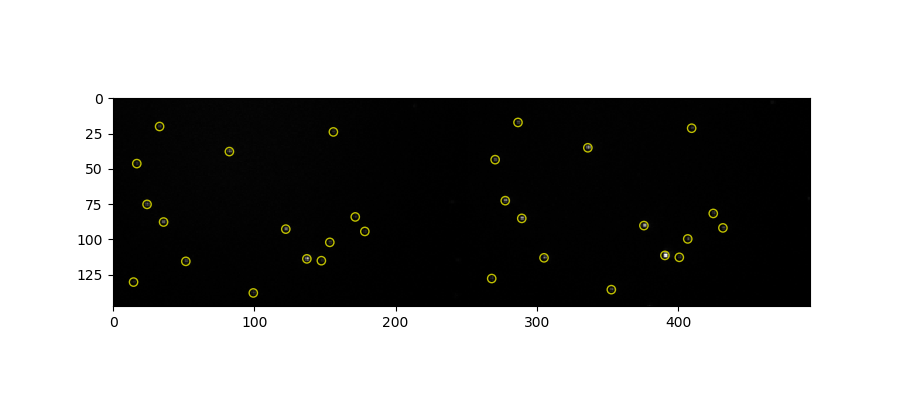

In [5]:
%matplotlib notebook
tr.set_bead_loc_opts(Path("beads", "beads_\d+_.SPE"))

Label(value='Starting…')

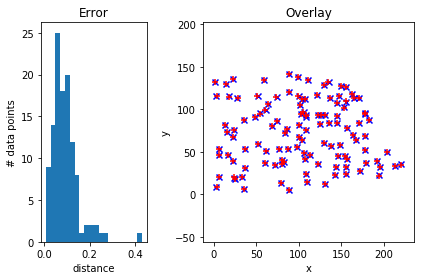

In [6]:
%matplotlib inline
tr.make_chromatic()

In [7]:
tr.add_dataset("sc", Path("sensor-H57", r"cells-(\d{2})_SAv-100k_SSS-H57-20k_(\d{3})_.SPE"))
tr.add_dataset("sn", Path("sensor-H57", r"no-cells_SAv-100k_SSS-H57-20k_(\d{3})_.SPE"))
tr.add_dataset("cc", Path("ctrl-H57", r"cells-(\d{2})_SAv-100k_SSS-ctrl-H57-50k_(\d{3})_.SPE"))
tr.add_dataset("cn", Path("ctrl-H57", r"no-cells_SAv-100k_SSS-ctrl-H57-50k_(\d{3})_.SPE"))

<IPython.core.display.Javascript object>


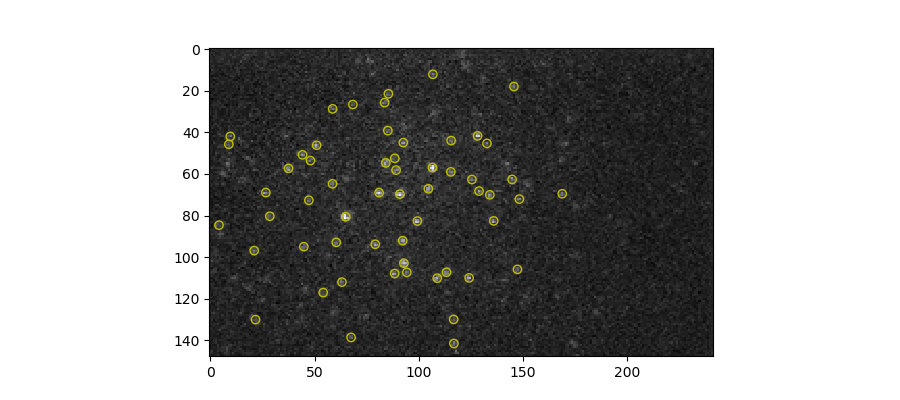

In [8]:
%matplotlib notebook
tr.set_don_loc_opts("sc", 0)

<IPython.core.display.Javascript object>


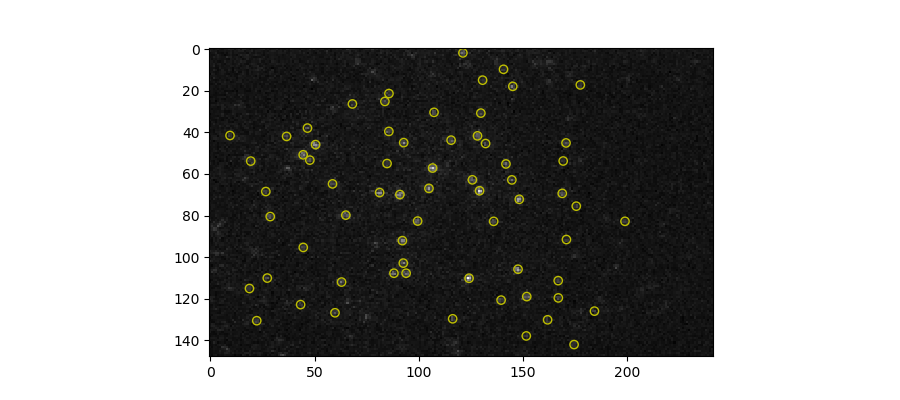

In [9]:
tr.set_acc_loc_opts("sc", 0)

In [10]:
tr.locate()

Label(value='Starting…')

In [11]:
tr.track(feat_radius=4, bg_frame=3, link_radius=2, link_mem=3, min_length=4, bg_estimator="mean")

Label(value='Starting…')

In [12]:
tr.analyze()

In [13]:
tr.save_data()